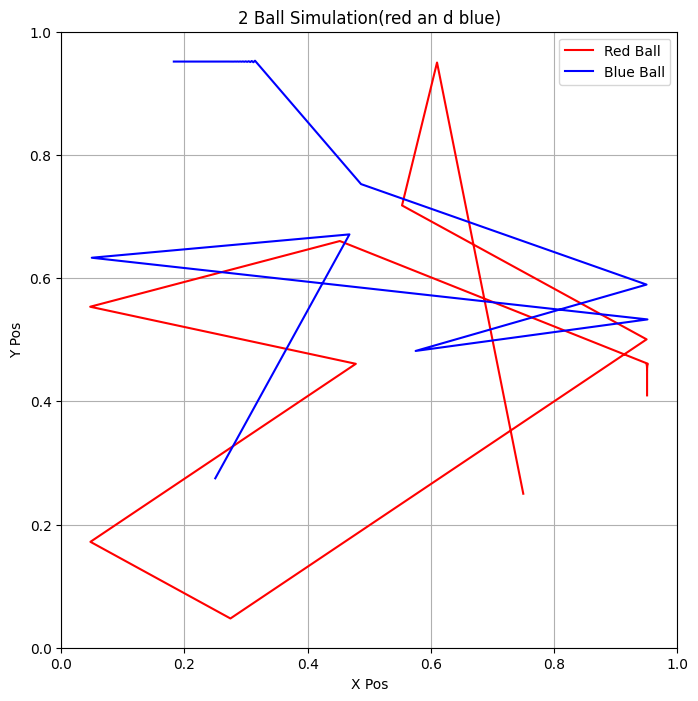

In [4]:
 import numpy as np
import matplotlib.pyplot as plt

# consts
dt = 0.02 
alpha = 0.8  
beta = 0.98  
finalTime = 50  
radius = 0.05  
tableDimens = (0, 1, 0, 1)  

# initial positions and velocities
redPosition = np.array([0.75, 0.25])  
bluePosition = np.array([0.25, 0.275]) 
redVelocity = np.array([-0.1, 0.5])  
blueVelocity = np.array([0.11, 0.2]) 

# Function to update position and velocity using Euler's method
def eulerStepUpdateMethod(position, velocity, dt):
    return position + velocity * dt, velocity

# handling colliding wall
def velocityPostWall(position, velocity):
    minX, maxX, minY, maxY = tableDimens
    
   
    if position[0] - radius < minX or position[0] + radius > maxX:
        velocity[0] = -alpha * velocity[0]  
        velocity[1] = beta * velocity[1]   

   
    if position[1] - radius < minY or position[1] + radius > maxY:
        velocity[1] = -alpha * velocity[1]  
        velocity[0] = beta * velocity[0]   

    return velocity


def ballCollideResults(pos1, vel1, pos2, vel2):
    distance = np.linalg.norm(pos1 - pos2)
    if distance < 2 * radius:  
        
        normal = (pos2 - pos1) / distance
        
        #tangential point
        tangent = np.array([-normal[1], normal[0]])

       
        normalVelocity1 = np.dot(vel1, normal) * normal
        tangVelocity1 = np.dot(vel1, tangent) * tangent

        normalVel2 = np.dot(vel2, normal) * normal
        tangVelocity2 = np.dot(vel2, tangent) * tangent

       
        vel1 = normalVel2 + tangVelocity1
        vel2 = normalVelocity1 + tangVelocity2

    return vel1, vel2









# simulate exper
redPosVector = []
bluePositionVector = []
time = 0




while time <= finalTime:
    
    redPosVector.append(redPosition.copy())
    bluePositionVector.append(bluePosition.copy())

    
    redPosition, redVelocity = eulerStepUpdateMethod(redPosition, redVelocity, dt)
    bluePosition, blueVelocity = eulerStepUpdateMethod(bluePosition, blueVelocity, dt)

    
    redVelocity = velocityPostWall(redPosition, redVelocity)
    blueVelocity = velocityPostWall(bluePosition, blueVelocity)

  
    redVelocity, blueVelocity = ballCollideResults(redPosition, redVelocity, bluePosition, blueVelocity)

 
    time += dt





redPosVector = np.array(redPosVector)
bluePositionVector = np.array(bluePositionVector)

plt.figure(figsize=(8, 8))
plt.plot(redPosVector[:, 0], redPosVector[:, 1], 'r-', label="Red Ball")
plt.plot(bluePositionVector[:, 0], bluePositionVector[:, 1], 'b-', label="Blue Ball")

plt.xlim(tableDimens[0], tableDimens[1])
plt.ylim(tableDimens[2], tableDimens[3])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X Pos')
plt.ylabel('Y Pos')
plt.title('2 Ball Simulation(red an d blue)')
plt.legend()
plt.grid()
plt.show()
